![Texte alternatif](image.png)

# <center>MADC Intership Program Generic</center>

# <center>ML-Tweets binary Classification</center>


# <center>Lahoucine MKHARBECH</center>

# <center>ORCL-DS-APP91999</center>

# Competition Notebook: Political vs. Sports Tweets Classification

# Goal

The purpose of this notebook is to document my approach and solutions for the Political vs. Sports Tweets Classification competition hosted by Oracle for the PFE 2024 internship candidates. The main objective of this competition is to develop a machine learning model that accurately classifies tweets into two categories: Political and Sports.

# Approach

I approached the competition using the following key steps:

Data Preprocessing: I began by loading and examining the dataset, which consists of tweets labeled as either Politics or Sports. I cleaned the text data, removed special characters, and performed tokenization.

Feature Extraction: To convert the text data into a format suitable for machine learning, I used various techniques such as TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings. These methods helped me capture the essence of each tweet's content.

Model Selection: I experimented with different classification algorithms, including Random Forest, Naive Bayes, and Support Vector Machines (SVM). I evaluated their performances using cross-validation and selected the best-performing algorithm.

Hyperparameter Tuning: To optimize the selected model's performance, I performed hyperparameter tuning using techniques like grid search or random search. This step aimed to find the best combination of hyperparameters for the chosen algorithm.

Model Evaluation: I assessed the final model's performance using metrics such as precision, recall, and F1-score. I also analyzed the model's confusion matrix to understand its strengths and weaknesses.

Results and Discussion: In this notebook, I present the outcomes of my efforts, showcasing the accuracy achieved by the final model on the test set. I discuss insights gained from the model's predictions and share my thoughts on potential areas for improvement.

By sharing this notebook, I aim to provide a clear overview of my approach to the competition and to contribute to the ongoing dialogue in the data science community.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 500)

import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from nltk.corpus import wordnet
import string
from nltk.stem.porter import PorterStemmer
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix
from wordcloud import STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lahoucine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lahoucine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Data Preprocessing:

In [2]:
# load the data
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
samples = pd.read_csv('sample_submission.csv')
training = pd.read_csv('training.csv')
df_train = df.copy()

In [3]:
df_train.head(10)

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...
5,306713195832307712,Politics,'Dr. Rajan: Fiscal consolidation will create m...
6,306100962337112064,Politics,"FACT: More than 800,000 defense employees will..."
7,305951758759366657,Sports,"'1st Test. Over 39: 0 runs, 1 wkt (M Wade 0, M..."
8,304482567158104065,Sports,Some of Africa's top teams will try and take a...
9,303806584964935680,Sports,'Can you beat the tweet of @RoryGribbell and z...


In [4]:
df_test.head(10)

,TweetId,TweetText
0,306486520121012224,'28. The home side threaten again through Maso...
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....
2,289531046037438464,'@Sochi2014 construction along the shores of t...
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...
5,305722428531802112,'Viswanathan Anand draws with Fabiano Caruana ...
6,304713516256997377,Have your say on tonight's game - send a text ...
7,234999630725783553,"'The #olympics may be over, but the #paralympi..."
8,303712268372283392,"'@richaanirudh big compliment, thanks!'"
9,304215754130194432,'Espargar\xf3 @PolEspargaro quickest as Jerez ...


In [5]:
samples.head(10)

,TweetId,Label
0,13439423987429,Sports
1,48523497520948,Politics
2,183749287598,Sports
3,12749274958729,Sports


In [6]:
training.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


In [8]:
df_train['Label'].unique()

array(['Politics', 'Sports'], dtype=object)

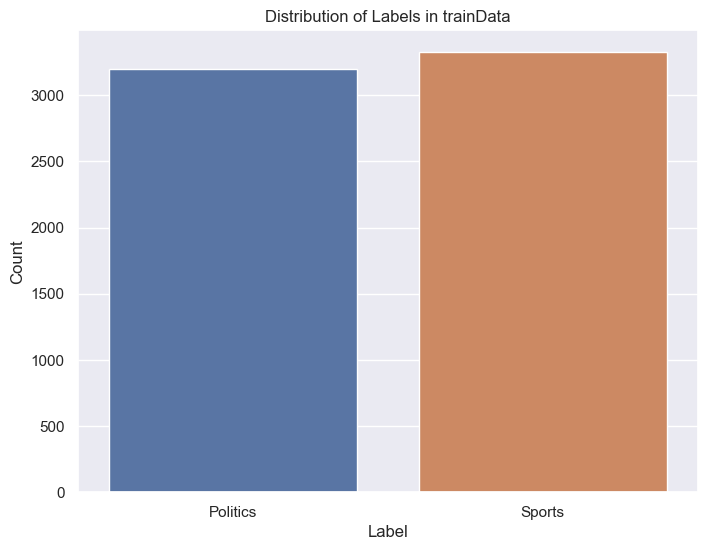

In [9]:
sns.set(style="darkgrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the figure size for the plot
sns.countplot(data=df_train, x='Label')  # Create a count plot for label distribution

plt.title("Distribution of Labels in trainData")  # Set the title of the plot
plt.xlabel("Label")  # Set the label for the x-axis
plt.ylabel("Count")  # Set the label for the y-axis

plt.show()  # Display the plot

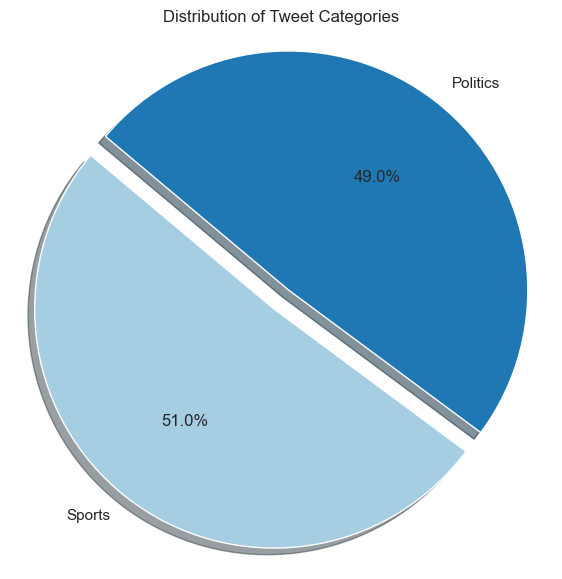

In [10]:
# Count the number of tweets per category
labels_counts = df_train['Label'].value_counts()

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(7, 7))

# Create a pie chart
colors = plt.cm.Paired.colors  # Use a color palette
explode = (0.1, 0)  # Explode the first slice (optional)
ax.pie(labels_counts, labels=labels_counts.index, autopct='%1.1f%%', startangle=140,
       colors=colors, explode=explode, shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a title
plt.title('Distribution of Tweet Categories')

# Show the pie chart
plt.show()

In [11]:
# Check for missing values
df_train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [12]:
def clean_text(text):
    #Remove web links, user mentions, numbers
    text = re.sub('http://[\S]+','',text)
    text = re.sub('www.[\S]+','',text)
    text = re.sub('@[\S]+','',text)
    text = re.sub('#','',text)
    #Remove punctuation
    text = re.sub('[^\w\s]','',text)
    #Replace multiple whitespace with single whitespace
    text = re.sub('\s+',' ',text)
    return text

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

stemmer = PorterStemmer()
def stem(text):
    stems = []
    for token in text:
        stems.append(stemmer.stem(token))
    return stems

stopwords_english = stopwords.words('english')
def remove_stopwords(text):
    filtered_words = [word for word in text if word not in stopwords_english]
    return filtered_words

def length_filter(text):
    filtered = []
    for token in text:
        if len(token) > 3 and len(token) < 20:
            filtered.append(token)
    return filtered

def lowercase(text):
    lowercased = []
    for word in text:
        lowercased.append(word.lower())
    return lowercased

In [13]:
#Apply preprocessing pipeline
df_train['cleaned_text'] = df_train['TweetText'].apply(clean_text)
df_train['tokenized_text'] = df_train['cleaned_text'].apply(tokenize)
df_train['stemmed_text'] = df_train['tokenized_text'].apply(stem)
df_train['stopwords_removed'] = df_train['stemmed_text'].apply(remove_stopwords)
df_train['length_filtered'] = df_train['stopwords_removed'].apply(length_filter)
df_train['lowercased'] = df_train['length_filtered'].apply(lowercase)

In [14]:
df_train.head()

,TweetId,Label,TweetText,cleaned_text,tokenized_text,stemmed_text,stopwords_removed,length_filtered,lowercased
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,SecKerry The value of the and is measured not ...,"[SecKerry, The, value, of, the, and, is, measu...","[seckerri, the, valu, of, the, and, is, measur...","[seckerri, valu, measur, dollar, term, deepest...","[seckerri, valu, measur, dollar, term, deepest...","[seckerri, valu, measur, dollar, term, deepest..."
1,304834304222064640,Politics,'@rraina1481 I fear so',I fear so,"[I, fear, so]","[i, fear, so]",[fear],[fear],[fear]
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,Watch video highlights of the wwc13 final betw...,"[Watch, video, highlights, of, the, wwc13, fin...","[watch, video, highlight, of, the, wwc13, fina...","[watch, video, highlight, wwc13, final, austra...","[watch, video, highlight, wwc13, final, austra...","[watch, video, highlight, wwc13, final, austra..."
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...,RT At Nitro Circus at AlbertPark theymakeitloo...,"[RT, At, Nitro, Circus, at, AlbertPark, theyma...","[rt, at, nitro, circu, at, albertpark, theymak...","[rt, nitro, circu, albertpark, theymakeitlooks...","[nitro, circu, albertpark, cantwaitforausgp]","[nitro, circu, albertpark, cantwaitforausgp]"
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...,Always a good thing Thanks for the feedback,"[Always, a, good, thing, Thanks, for, the, fee...","[alway, a, good, thing, thank, for, the, feedb...","[alway, good, thing, thank, feedback]","[alway, good, thing, thank, feedback]","[alway, good, thing, thank, feedback]"


# Feature Extraction:

TF-IDF is a technique that assigns weights to terms in a document based on their frequency and importance in the corpus.

The TfidfVectorizer from scikit-learn simplifies the process of calculating TF-IDF values for text data.

The resulting tfidf_matrix is a sparse matrix, and converting it to a dense array using toarray() provides more convenient access to the features.

The new features are concatenated with the original DataFrame, creating df_train_tfidf which now includes the TF-IDF features.

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust 'max_features' as needed

# Fit and transform the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df_train['lowercased'].apply(lambda x: ' '.join(x)))

# Convert the TF-IDF matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

# Create a DataFrame to store the TF-IDF features
tfidf_df = pd.DataFrame(tfidf_array, columns=tfidf_vectorizer.get_feature_names_out())

# Concatenate the TF-IDF features with the original DataFrame
df_train_tfidf = pd.concat([df_train, tfidf_df], axis=1)

In [16]:
df_train_tfidf.head()

,TweetId,Label,TweetText,cleaned_text,tokenized_text,stemmed_text,stopwords_removed,length_filtered,lowercased,12th,1962,1986,1990,2009,2012,2012amn,2013,2013am,2013amn,2013pm,2013pmn,2014,3peat,3pete,accept,account,achiev,across,action,activ,address,adopt,advanc,aegon,afford,afghanistan,africa,african,afternoon,agenc,agenda,agre,agreement,ahead,algeria,almost,along,alreadi,also,alway,amaz,america,american,anniversari,announc,anoth,answer,appeal,appoint,approach,april,around,arriv,articl,ashwin,assist,attack,attend,ausavengl,ausgp,ausopen,aussi,australia,ausveng,author,avail,averag,avoid,award,away,awesom,back,background,balanc,ball,bangladesh,bank,barack,barcelona,base,basketbal,batsman,battl,bbcfootbal,bbcsportsday,bbl02,bcim,bcim2013,beat,beauti,...,though,thought,three,thursday,ticket,time,titl,today,togeth,tomorrow,tonight,took,toss,total,tough,tour,tournament,toward,town,track,trade,traffic,train,travel,trend,tribut,trip,trophi,troubl,true,tuesday,tune,turn,tweet,twitter,u2013,u201c,unbeaten,understand,underway,union,unit,univers,updat,valentin,valu,veri,vice,victori,video,view,vijay,violenc,visit,vladimir,volunt,vote,wade,wage,wait,want,warn,warner,washington,watch,watson,websit,wedemandavot,week,weekend,weekli,welcom,well,wembley,west,weve,whether,white,wicket,william,wing,winner,winter,wish,within,without,women,word,work,worker,workshop,world,would,wrap,wwc13,year,yesterday,young,youth,zealand
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...,SecKerry The value of the and is measured not ...,"[SecKerry, The, value, of, the, and, is, measu...","[seckerri, the, valu, of, the, and, is, measur...","[seckerri, valu, measur, dollar, term, deepest...","[seckerri, valu, measur, dollar, term, deepest...","[seckerri, valu, measur, dollar, term, deepest...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.288246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.759075,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,304834304222064640,Politics,'@rraina1481 I fear so',I fear so,"[I, fear, so]","[i, fear, so]",[fear],[fear],[fear],0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...,Watch video highlights of the wwc13 final betw...,"[Watch, video, highlights, of, the, wwc13, fin...","[watch, video, highlight, of, the, wwc13, fina...","[watch, video, highlight, wwc13, final, austra...","[watch, video, highlight, wwc13, final, austra...","[watch, video, highlight, wwc13, final, austra...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

# Model Selection:

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score


# Splitting data into training and testing sets
X = df_train['lowercased'].apply(lambda x: ' '.join(x))  # Join the list of words into a string
y = df_train['Label']         # target labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize models
naive_bayes_model = MultinomialNB()
svm_model = SVC()
random_forest_model = RandomForestClassifier()

models = [naive_bayes_model, svm_model, random_forest_model]
model_names = ['Naive Bayes', 'SVM', 'Random Forest']

# Evaluate models using cross-validation
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train_tfidf, y_train, cv=5, scoring='accuracy')
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")

Naive Bayes Cross-Validation Accuracy: 0.9121 (+/- 0.0077)
SVM Cross-Validation Accuracy: 0.9105 (+/- 0.0097)
Random Forest Cross-Validation Accuracy: 0.8916 (+/- 0.0121)


# Hyperparameter Tuning:

In [18]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Create an SVM classifier
svm_model = SVC()

# Create a GridSearchCV object
grid_search = GridSearchCV(svm_model, param_grid, cv=5, n_jobs=-1)

# Perform grid search on the training data
grid_search.fit(X_train_tfidf, y_train)

# Get the best model with optimized hyperparameters
best_model = grid_search.best_estimator_

# Fit the best model on the training data
best_model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = best_model.predict(X_test_tfidf)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Best Model Test Accuracy: {accuracy:.4f}")
print(f"Best Model Test F1 Score: {f1:.4f}")

Best Model Test Accuracy: 0.9111
Best Model Test F1 Score: 0.9110


# Model Evaluation:

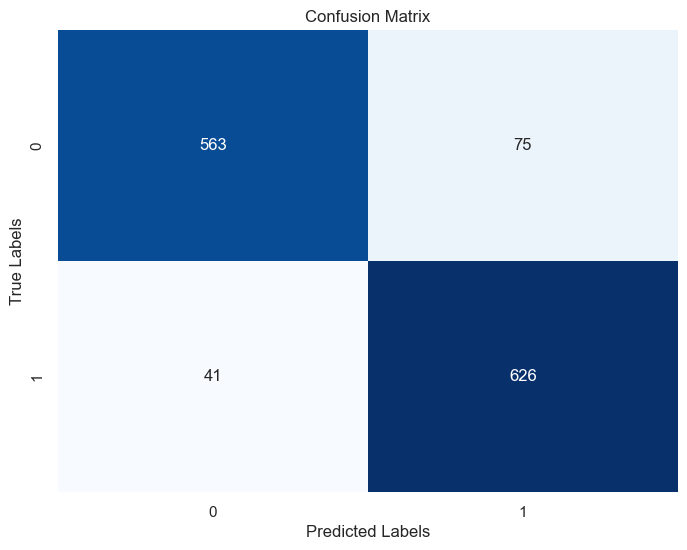

Classification Report:
               precision    recall  f1-score   support

    Politics       0.93      0.88      0.91       638
      Sports       0.89      0.94      0.92       667

    accuracy                           0.91      1305
   macro avg       0.91      0.91      0.91      1305
weighted avg       0.91      0.91      0.91      1305



In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Calculate and print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

In [20]:
#Apply preprocessing pipeline
df_test['cleaned_text'] = df_test['TweetText'].apply(clean_text)
df_test['tokenized_text'] = df_test['cleaned_text'].apply(tokenize)
df_test['stemmed_text'] = df_test['tokenized_text'].apply(stem)
df_test['stopwords_removed'] = df_test['stemmed_text'].apply(remove_stopwords)
df_test['length_filtered'] = df_test['stopwords_removed'].apply(length_filter)
df_test['lowercased'] = df_test['length_filtered'].apply(lowercase)

In [24]:
# Assuming you have a 'TweetText' column containing the lowercased text in df_test
X = df_test['TweetText'].apply(lambda x: ' '.join(x))  # Use 'TweetText' column
X_test_tfidf = tfidf_vectorizer.transform(X)
test_pred = best_model.predict(X_test_tfidf)

# Add the predicted labels to the original dataframe
df_test['Label'] = test_pred

df_test1 = df_test[['TweetId', 'Label']]

# Save the results to a CSV file
df_test1.to_csv("predicted_results.csv", index=False)

In [25]:
df_test.head(10)

,TweetId,TweetText,cleaned_text,tokenized_text,stemmed_text,stopwords_removed,length_filtered,lowercased,PredictedLabel,Label
0,306486520121012224,'28. The home side threaten again through Maso...,28 The home side threaten again through Mason ...,"[28, The, home, side, threaten, again, through...","[28, the, home, side, threaten, again, through...","[28, home, side, threaten, mason, bennett, get...","[home, side, threaten, mason, bennett, long, l...","[home, side, threaten, mason, bennett, long, l...",Sports,Sports
1,286353402605228032,'@mrbrown @aulia Thx for asking. See http://t....,Thx for asking See It derives from a series o...,"[Thx, for, asking, See, It, derives, from, a, ...","[thx, for, ask, see, it, deriv, from, a, seri,...","[thx, ask, see, deriv, seri, abbrevi, pound, a...","[deriv, seri, abbrevi, pound, avoirdupoi, unit...","[deriv, seri, abbrevi, pound, avoirdupoi, unit...",Sports,Sports
2,289531046037438464,'@Sochi2014 construction along the shores of t...,construction along the shores of the Black Sea,"[construction, along, the, shores, of, the, Bl...","[construct, along, the, shore, of, the, black,...","[construct, along, shore, black, sea]","[construct, along, shore, black]","[construct, along, shore, black]",Sports,Sports
3,306451661403062273,'#SecKerry\u2019s remarks after meeting with F...,SecKerryu2019s remarks after meeting with Fore...,"[SecKerryu2019s, remarks, after, meeting, with...","[seckerryu2019, remark, after, meet, with, for...","[seckerryu2019, remark, meet, foreign, minist,...","[seckerryu2019, remark, meet, foreign, minist,...","[seckerryu2019, remark, meet, foreign, minist,...",Sports,Sports
4,297941800658812928,'The #IPLauction has begun. Ricky Ponting is t...,The IPLauction has begun Ricky Ponting is the ...,"[The, IPLauction, has, begun, Ricky, Ponting, ...","[the, iplauct, ha, begun, ricki, pont, is, the...","[iplauct, ha, begun, ricki, pont, first, playe...","[iplauct, begun, ricki, pont, first, player, h...","[iplauct, begun, ricki, pont, first, player, h...",Sports,Sports
5,305722428531802112,'Viswanathan Anand draws with Fabiano Caruana ...,Viswanathan Anand draws with Fabiano Caruana a...,"[Viswanathan, Anand, draws, with, Fabiano, Car...","[viswanathan, anand, draw, with, fabiano, caru...","[viswanathan, anand, draw, fabiano, caruana, z...","[viswanathan, anand, draw, fabiano, caruana, z...","[viswanathan, anand, draw, fabiano, caruana, z...",Sports,Sports
6,304713516256997377,Have your say on tonight's game - send a text ...,Have your say on tonights game send a text to ...,"[Have, your, say, on, tonights, game, send, a,...","[have, your, say, on, tonight, game, send, a, ...","[say, tonight, game, send, text, 81892, start,...","[tonight, game, send, text, 81892, start, twee...","[tonight, game, send, text, 81892, start, twee...",Sports,Sports
7,234999630725783553,"'The #olympics may be over, but the #paralympi...",The olympics may be over but the paralympics a...,"[The, olympics, may, be, over, but, the, paral...","[the, olymp, may, be, over, but, the, paralymp...","[olymp, may, paralymp, begin, sure, follow, la...","[olymp, paralymp, begin, sure, follow, latest,...","[olymp, paralymp, begin, sure, follow, latest,...",Sports,Sports
8,303712268372283392,"'@richaanirudh big compliment, thanks!'",big compliment thanks,"[big, compliment, thanks]","[big, compliment, thank]","[big, compliment, thank]","[compliment, thank]","[compliment, thank]",Sports,Sports
9,304215754130194432,'Espargar\xf3 @PolEspargaro quickest as Jerez ...,Espargarxf3 quickest as Jerez day two gets off...,"[Espargarxf3, quickest, as, Jerez, day, two, g...","[espargarxf3, quickest, as, jerez, day, two, g...","[espargarxf3, quickest, jerez, day, two, get, ...","[espargarxf3, quickest, jerez, slow, start, mo...","[espargarxf3, quickest, jerez, slow, start, mo...",Sports,Sports
